# Loan Status Bayesian Netowrk

In [1]:
from pylab import *
import matplotlib.pyplot as plt
import os
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

bn=gum.BayesNet('Loan Status')

In [2]:
living_area = bn.add(gum.LabelizedVariable("Living Area","c",['Small City','Big City','Village']))
age = bn.add(gum.LabelizedVariable("Age","b",['Young','Adult','Old']))
education = bn.add(gum.LabelizedVariable("Education","a",["Middle School", "High School", "University"]))

In [3]:
bn.addArc(living_area,education)
bn.addArc(age,education)

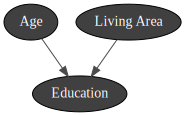

In [4]:
from pyAgrum.lib.notebook import showBN, showInformation

showBN(bn,size=10)

In [5]:
bn.cpt(age).fillWith([0.3333,0.3333,0.3333])
bn.cpt("Living Area").fillWith([0.3,0.5,0.2])

(gum::Potential<double>@000002A3911803B0) 
  Living Area                |
Small Cit|Big City |Village  |
---------|---------|---------|
 0.3000  | 0.5000  | 0.2000  |

In [6]:
# Education values order: Middle School--High School--University
bn.cpt(education)[{'Age': "Young", 'Living Area': "Small City"}] = [0.4, 0.5, 0.1]
bn.cpt(education)[{'Age': "Young", 'Living Area': "Big City"}] = [0.3,0.5,0.2]
bn.cpt(education)[{'Age': "Young", 'Living Area': "Village"}] = [0.6, 0.3, 0.1]
bn.cpt(education)[{'Age': "Adult", 'Living Area': "Small City"}] = [0.3, 0.5, 0.2]
bn.cpt(education)[{'Age': "Adult", 'Living Area': "Big City"}] = [0.4, 0.5, 0.1]
bn.cpt(education)[{'Age': "Adult", 'Living Area': "Village"}] = [0.1, 0.6, 0.3]
bn.cpt(education)[{'Age': "Old", 'Living Area': "Small City"}] = [0.3, 0.3, 0.4]
bn.cpt(education)[{'Age': "Old", 'Living Area': "Big City"}] = [0.4, 0.5, 0.1]
bn.cpt(education)[{'Age': "Old", 'Living Area': "Village"}] = [0.8, 0.1, 0.1]


In [7]:
bn.cpt(education)

(gum::Potential<double>@000002A3911801F0) 
             ||  Education                  |
Living|Age   ||Middle Sc|High Scho|Universit|
------|------||---------|---------|---------|
Small |Young || 0.4000  | 0.5000  | 0.1000  |
Big Ci|Young || 0.3000  | 0.5000  | 0.2000  |
Villag|Young || 0.6000  | 0.3000  | 0.1000  |
Small |Adult || 0.3000  | 0.5000  | 0.2000  |
Big Ci|Adult || 0.4000  | 0.5000  | 0.1000  |
Villag|Adult || 0.1000  | 0.6000  | 0.3000  |
Small |Old   || 0.3000  | 0.3000  | 0.4000  |
Big Ci|Old   || 0.4000  | 0.5000  | 0.1000  |
Villag|Old   || 0.8000  | 0.1000  | 0.1000  |

In [8]:
print(bn)

BN{nodes: 3, arcs: 2, domainSize: 27, dim: 33}


In [9]:
gum.generateCSV(bn,"generated_dataset.csv",100,with_labels=True)

-460.72121741699897

In [10]:
# generator = gum.BNDatabaseGenerator(bn)

In [11]:
gender = bn.add(gum.LabelizedVariable("Gender",'d',['Male','Female']))
income = bn.add(gum.LabelizedVariable('Income','e',['<50k','50-100k','>100k']))
ethnicity = bn.add(gum.LabelizedVariable('Ethnicity','f',['Caucasian','Not Caucasian']))
disc_factor = bn.add(gum.LabelizedVariable('Discriminatory Factor','g',['None','Racism','Misogyny']))
loan_amount = bn.add(gum.LabelizedVariable('Loan Amount','h',['Small','Standard','High']))
credit_score = bn.add(gum.LabelizedVariable('Credit Score','i',['Low','Medium','High']))
credit_hist = bn.add(gum.LabelizedVariable('Credit History','l',['Respectful','Disrespectful']))
econ_status = bn.add(gum.LabelizedVariable('Economic Status','m',['Growth','Crisis']))
loan_status = bn.add(gum.LabelizedVariable('Loan Status','n',['Approved','Not Approved']))

In [12]:
bn.addArc(age,income)
bn.addArc(gender,disc_factor)
bn.addArc(living_area,ethnicity)
bn.addArc(ethnicity,disc_factor)
bn.addArc(living_area,loan_amount)
bn.addArc(income,loan_amount)
bn.addArc(education,credit_score)
bn.addArc(income,credit_score)
bn.addArc(credit_hist,credit_score)
bn.addArc(econ_status,loan_amount)
bn.addArc(loan_amount,loan_status)
bn.addArc(credit_score,loan_status)
bn.addArc(econ_status,loan_status)
bn.addArc(age,disc_factor)
bn.addArc(disc_factor,loan_status)

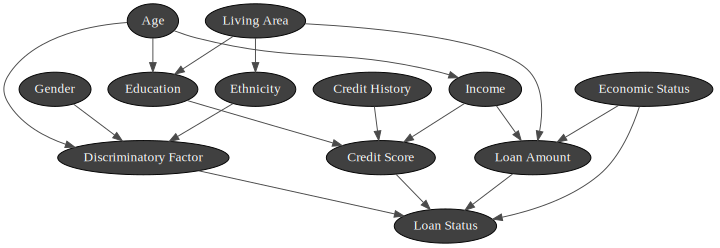

In [13]:
from pyAgrum.lib.notebook import showBN, showInformation

showBN(bn,size=10,nodeColor='black')